In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from skimage.filters import gaussian


%matplotlib inline

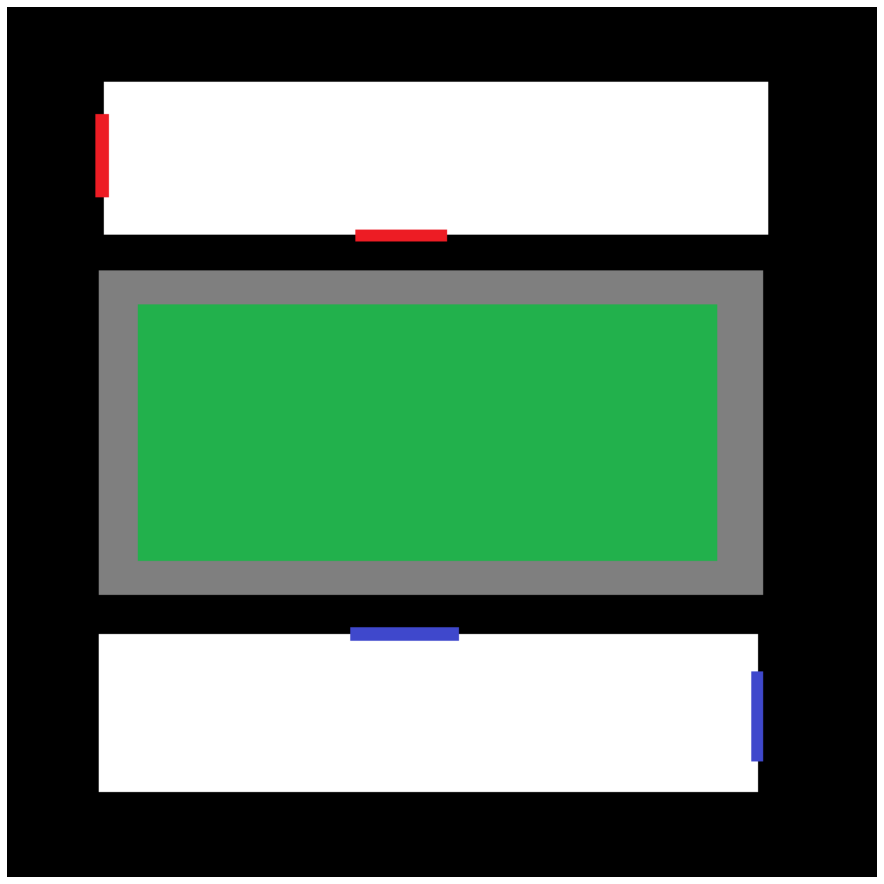

In [2]:
def display(image, cmap='gray'):
    '''
    Use matplotlib to display an image
    '''
    plt.figure(figsize=(16,16))
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()    

img = cv2.imread('basic_map.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

In [3]:
'''
Define the colors that we want to separate out. 
Each color needs to have a separate vector field so that weighting can be done.
For example, the aversion to walk on grass is much less than the aversion to walk into a wall.
Similarly, there is an attraction to walk on a path rather than on the road.
'''

path = np.array([127, 127, 127])
grass = np.array([34, 177, 76])
obstacle = np.array([255, 255, 255])
red = np.array([237, 28, 36])
blue = np.array([63, 72, 204])

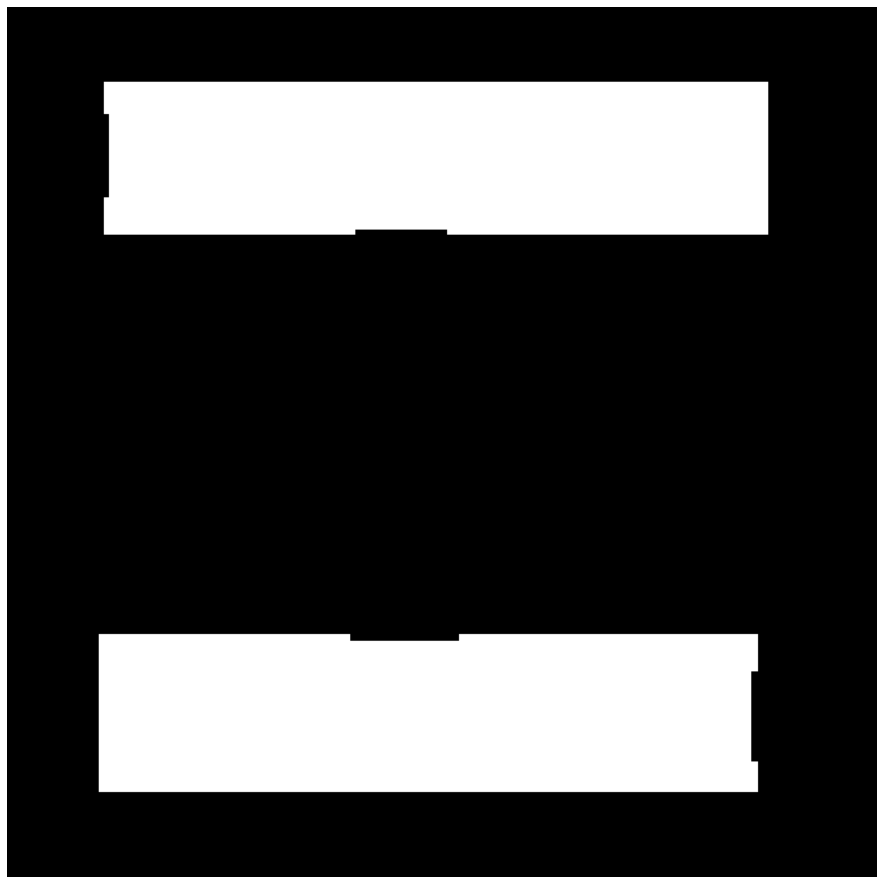

In [4]:
def mask(color, img):
    '''
    Create a mask for where a color is located on the image.
    To do this we need to create 3 masks, one for each color channel, and AND them together.
    '''
    return 1.0 * ((img[:, :, 0] == color[0]) & (img[:, :, 1] == color[1]) & (img[:, :, 2] == color[2]))

display(mask(obstacle, img))

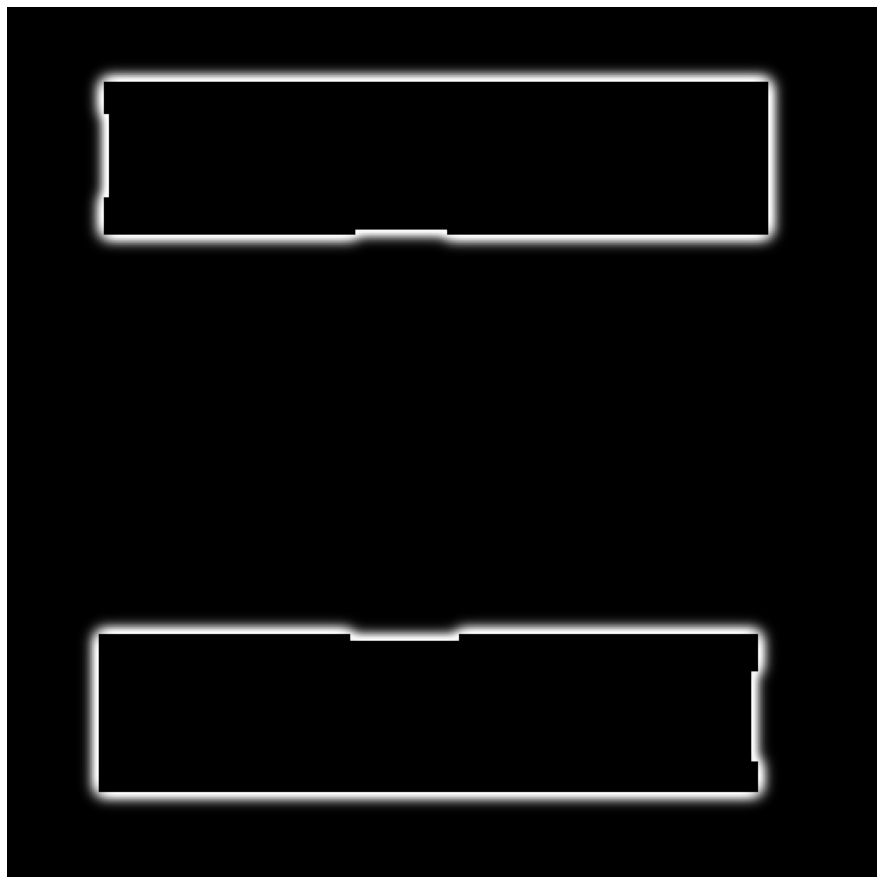

In [39]:
obs_mask = mask(obstacle, img).astype(bool)

# Use np.gradient to find the gradient of the brightness
# Apply a Gaussian blurring filter to smooth out the boundaries of the obstacles
# This generates a gradient field that increases as you get closer to the building
dx, dy = np.gradient(gaussian(mask(obstacle, img), sigma=4))

# I was trying to plot the gradient field using a quiver plot but I couldn't get it working well
pixels = np.linspace(0, 512, 512, endpoint=False).astype(int)
x, y = np.meshgrid(pixels, pixels)

# Here is a display of the magnitude of the gradient field. 
# I removed the actual building using the mask since I wanted to show where the field is (not the building).
magnitude = np.sqrt(dx ** 2 + dy ** 2)
display(np.where(~obs_mask, magnitude, 0))


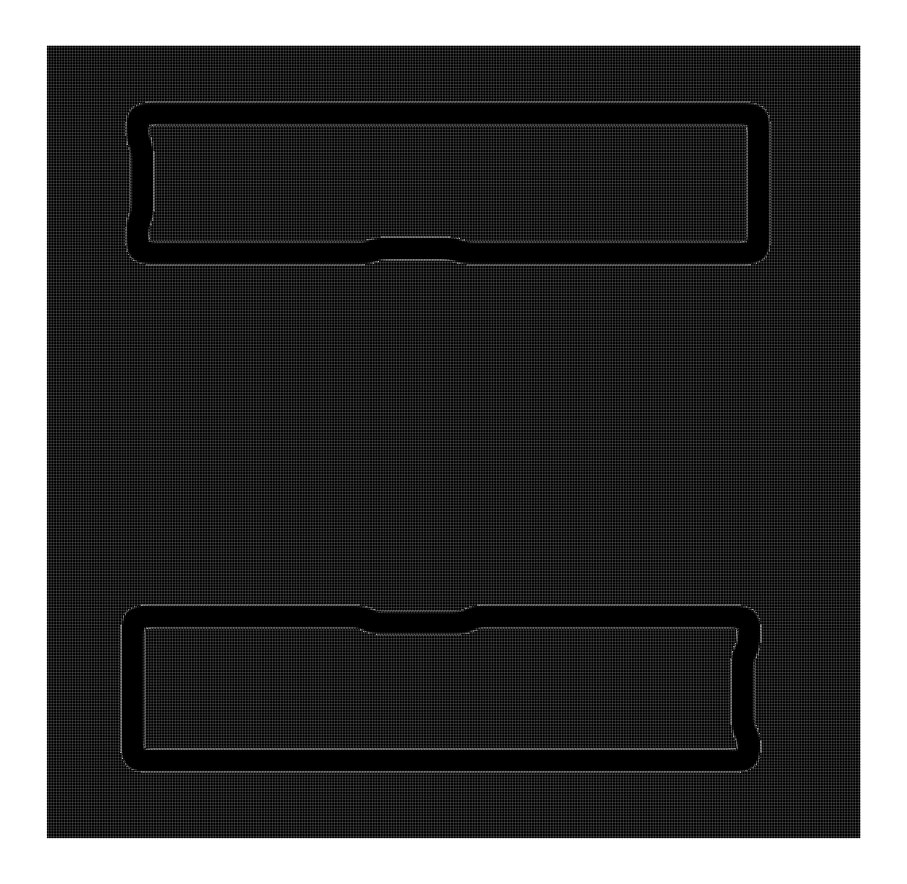

In [41]:
# My attempts at visualizing the field.
plt.figure(figsize=(16,16))

# Reverse y coordinates because image and axes y are reverses.
plt.quiver(x, y[::-1], dx, dy)
plt.axis('off')
plt.show()

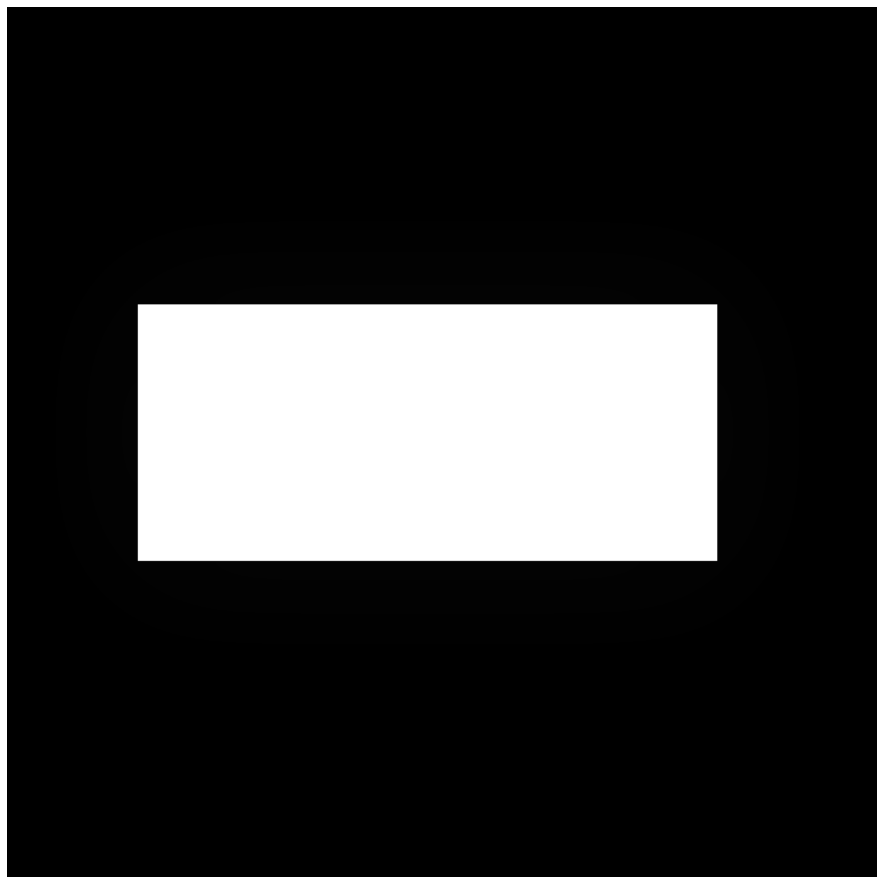

In [80]:
# Doing the same process, but for the grass. 

grass_mask = mask(grass, img).astype(bool)

dx, dy = np.gradient(gaussian(mask(grass, img), sigma=32))

pixels = np.linspace(0, 512, 512, endpoint=False).astype(int)
x, y = np.meshgrid(pixels, pixels)

magnitude = np.sqrt(dx ** 2 + dy ** 2)

display(np.where(~grass_mask, magnitude, 0))